In [9]:
import os, sys, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nglview as nv
import mdtraj  as md
import MDAnalysis as mda
import barnaba as bb
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper_style.mpl')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_path = '/Volumes/potoyan-lab/vysakh/rna_single/angles_all'
file_list = sorted(glob.glob(f'{data_path}/*.npy*'))

def grab_angles(base='A', temp_i=0):
    '''a function to grab dihedral agnle data (featurized trajectory) for subsequent analysis'''
    
    bases = {'A':0, 'C':40, 'G':80, 'U':120}
    
    print('loading', file_list[bases[base] + temp_i])    
    
    return np.load(file_list[bases[base]+temp_i])

### Load data

In [7]:
feature_traj2 = grab_angles('A', 2)

loading /Volumes/potoyan-lab/vysakh/rna_single/angles_all/A_310.856.npy


In [8]:
pca = PCA(n_components=20)
proj = pca.fit_transform(feature_traj2)

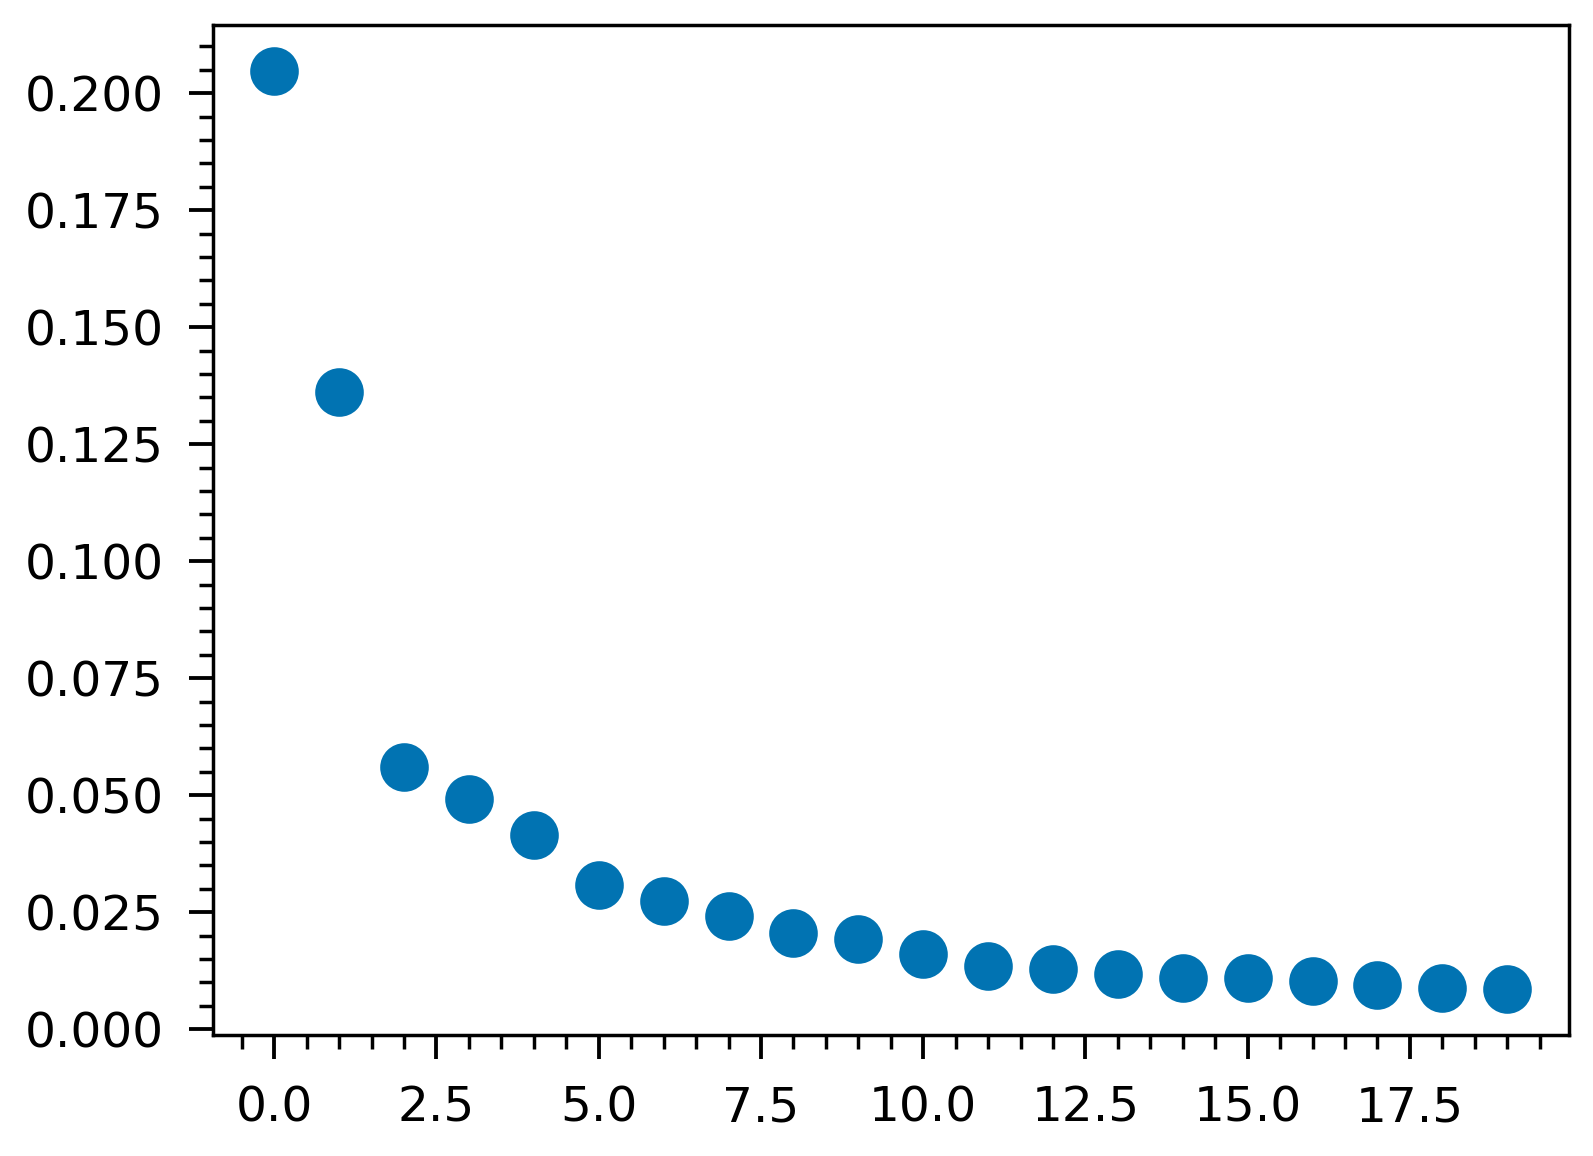

In [11]:
plt.plot(pca.explained_variance_ratio_, 'o')
print('')

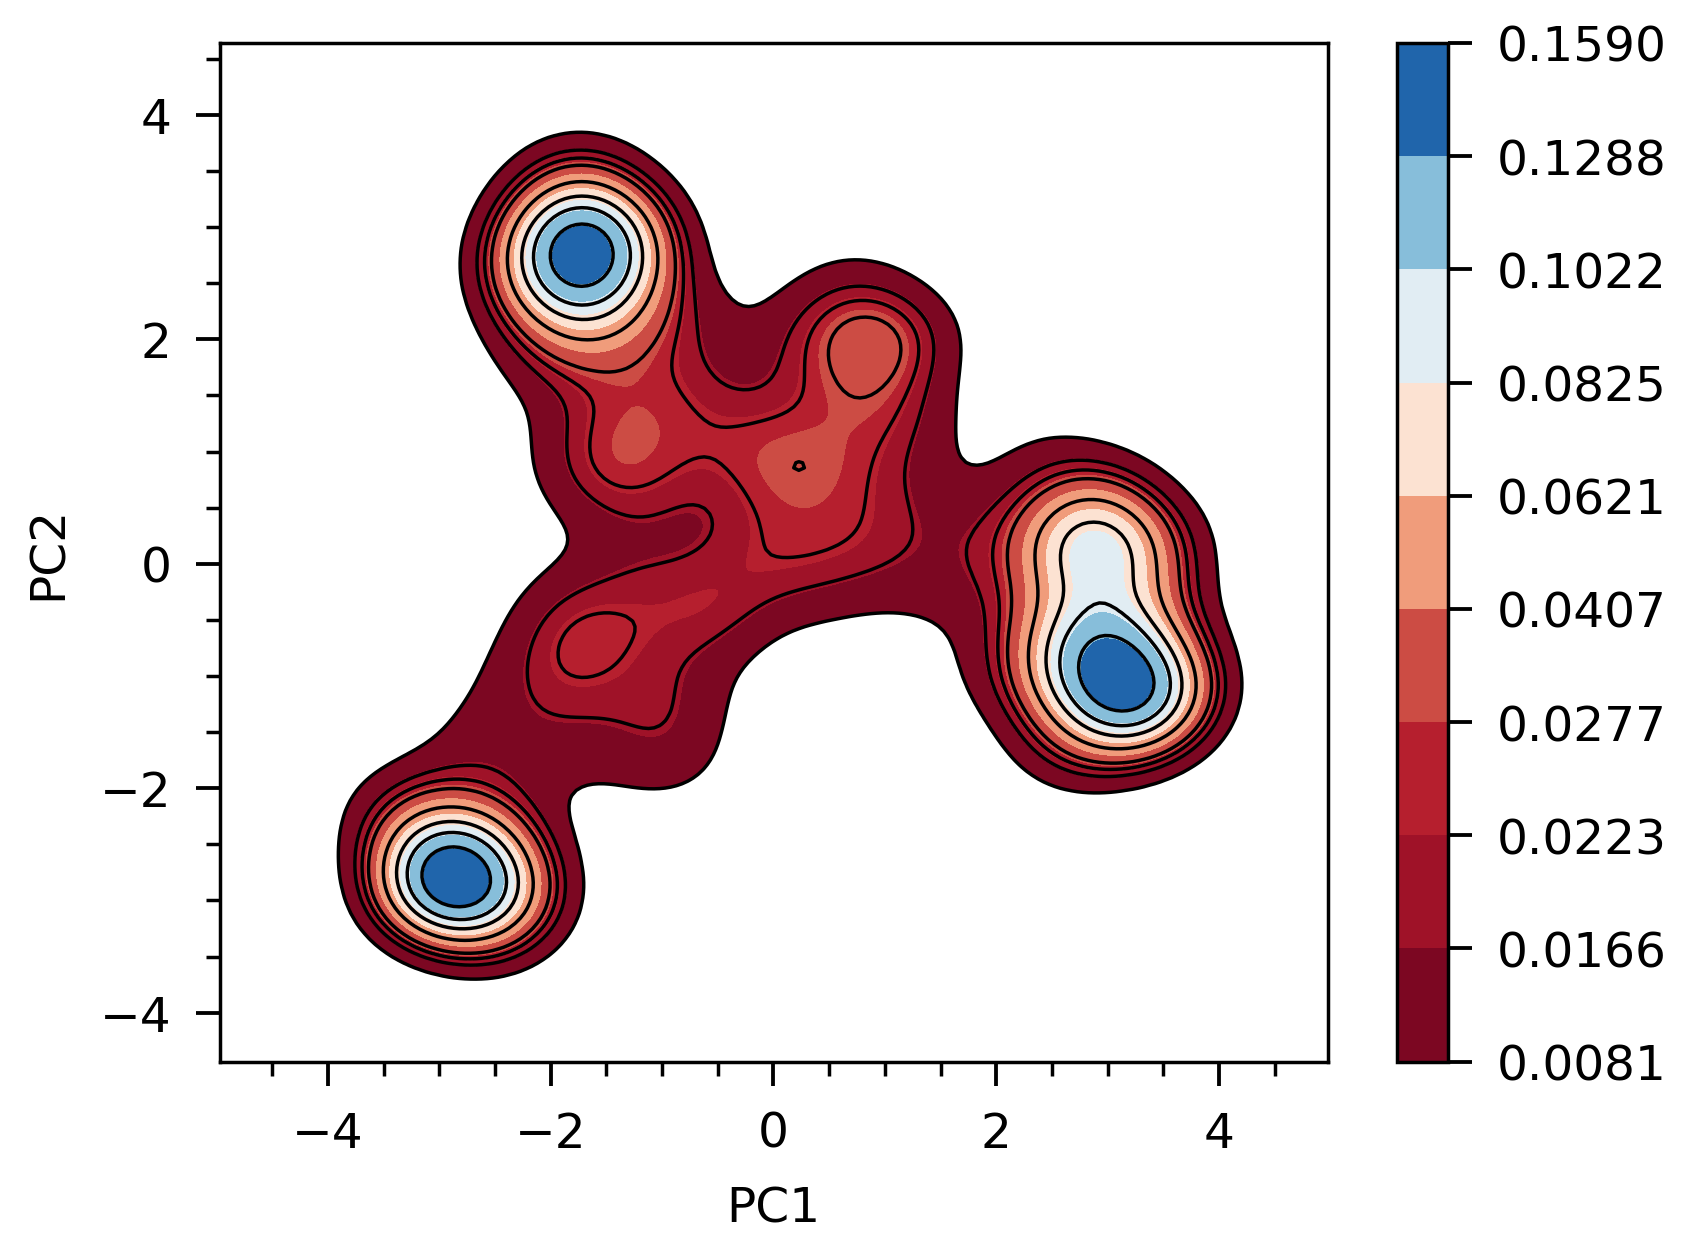

In [12]:
fig, ax = plt.subplots()

sns.kdeplot(x=proj[:,0],
            y=proj[:,1],
            cmap="RdBu",
            fill=True, 
            cbar=True,
            ax=ax)

# Add contour lines
sns.kdeplot(x=proj[:,0], 
            y=proj[:,1], 
            levels=9, 
            colors='k', 
            linewidths=0.5, 
            ax=ax)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.tight_layout()

### TICA plots

- Need to use reweighting since simulation is not a stratight MD. [See here](https://deeptime-ml.github.io/latest/notebooks/tica.html)

In [35]:
from deeptime.decomposition import TICA
from deeptime.covariance import KoopmanWeightingEstimator

tica = TICA(lagtime=1, dim=20)

koopman_estimator = KoopmanWeightingEstimator(lagtime=1)
reweighting_model = koopman_estimator.fit(feature_traj2).fetch_model()

tica_model = tica.fit(feature_traj2, weights=reweighting_model).fetch_model()

tica_proj = tica_model.transform(feature_traj2)

In [36]:
tica_proj.shape, feature_traj2.shape

((66175, 20), (66175, 252))

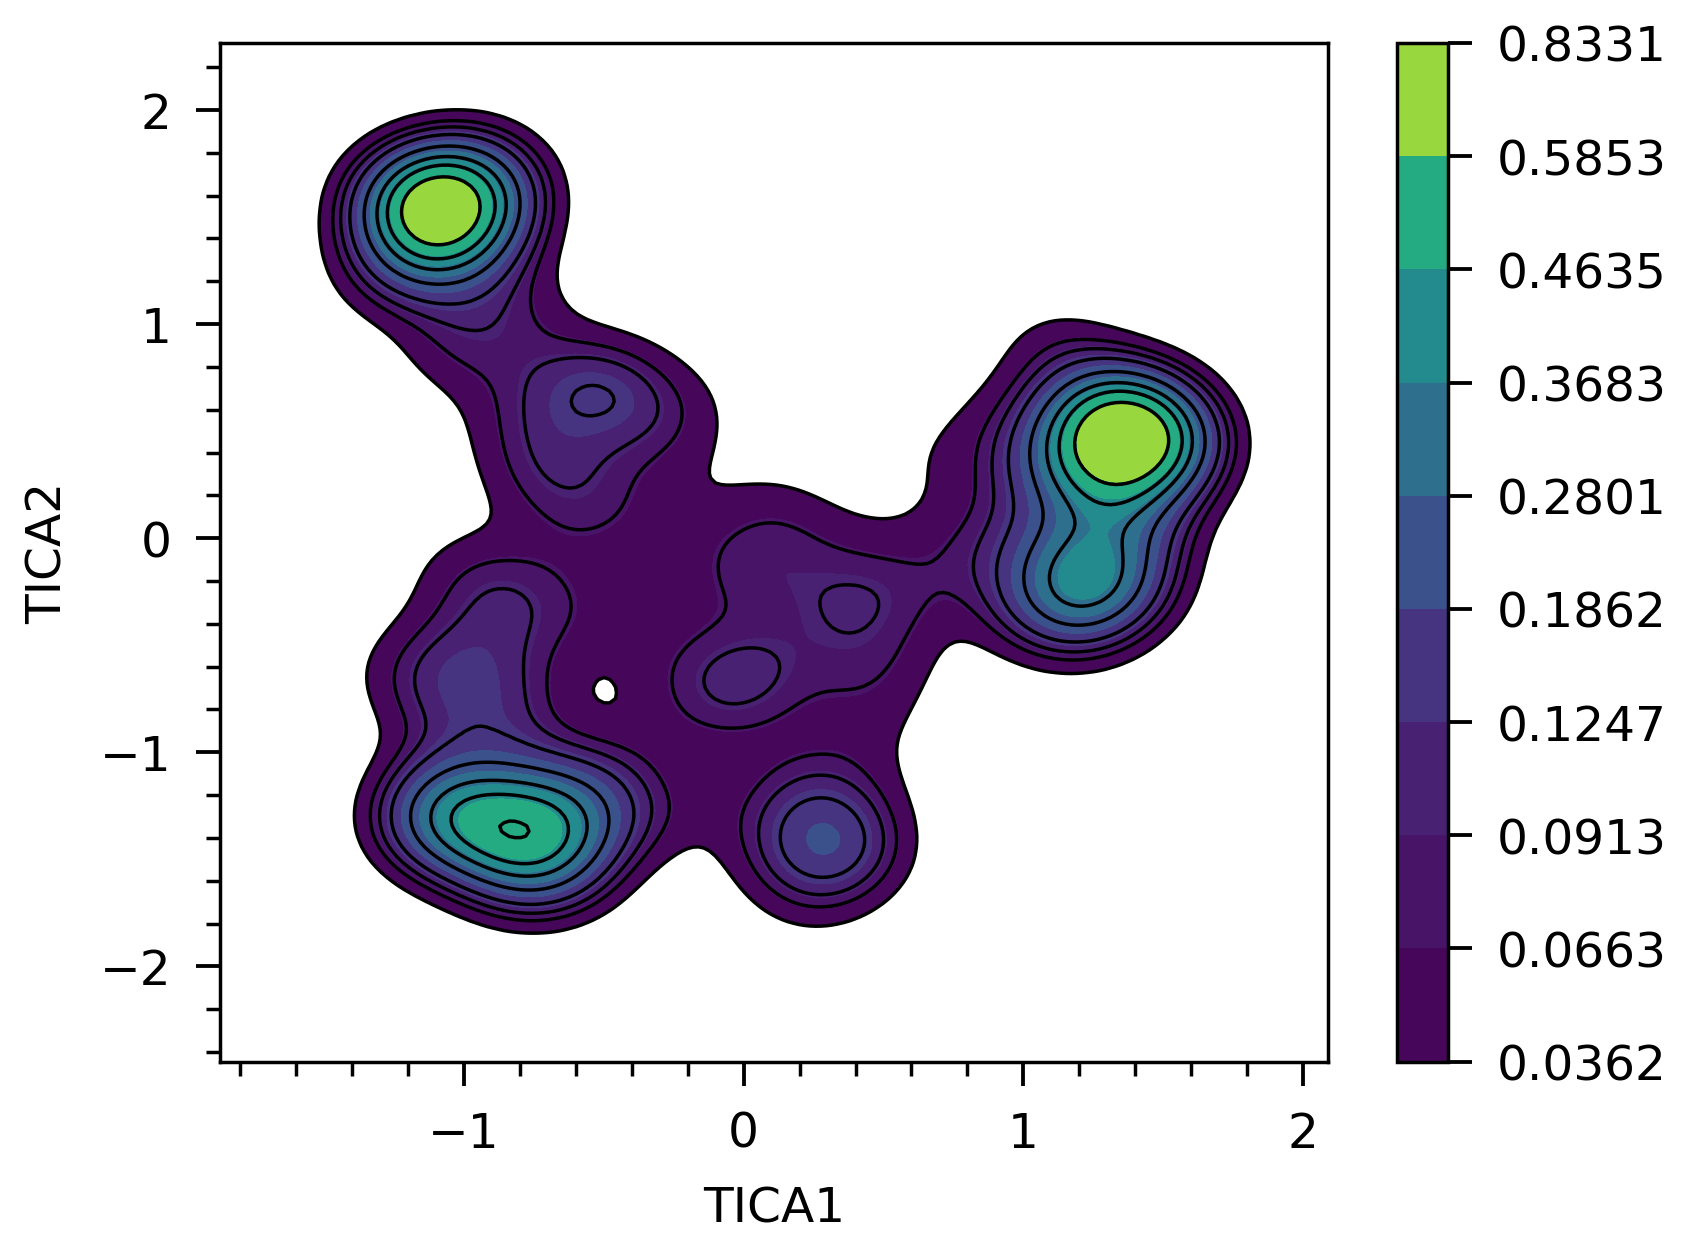

In [38]:
fig, ax = plt.subplots()

sns.kdeplot(x=tica_proj[:,0],
            y=tica_proj[:,1],
            cmap="viridis",
            fill=True, 
            cbar=True,
            ax=ax)

# Add contour lines
sns.kdeplot(x=tica_proj[:,0], 
            y=tica_proj[:,1], 
            levels=9, 
            colors='k', 
            linewidths=0.5, 
            ax=ax)


ax.set_xlabel('TICA1')
ax.set_ylabel('TICA2')
fig.tight_layout()